**HAND WRITTEN DIGIT PREDICTION - CLASSIFICATION ANALYSIS**

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first four images. The target attribute of the dataset stores the digit each image represents.

DATA SOURCE

The data used in this project is the digits dataset from the `sklearn.datasets` module.


IMPORT LIBRARY

In [ ]:
# import library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

IMPORT DATA

In [ ]:
# import data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

DATA VISUALIZATION

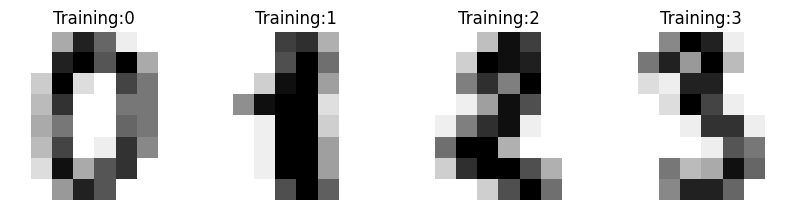

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training:%i" % label)

DESCRIBE DATA

In [ ]:
# Data processing

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

DATA PREPROCESSING

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

In [ ]:
# Scaling image data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

TRAIN TEST SPLIT

In [ ]:
# train test split data

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train,X_test,y_train,y_test=train_test_split(data, df.target, test_size=0.3)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

MODELING

In [33]:
# Random forest model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier()

PREDICTION

In [41]:
# Predict the test data
y_pred = rf.predict(X_test)

In [42]:
y_pred

array([5, 2, 3, 8, 5, 4, 3, 9, 3, 8, 3, 2, 7, 2, 0, 7, 5, 6, 7, 8, 2, 0,
       1, 9, 2, 0, 2, 9, 9, 2, 4, 3, 3, 0, 3, 4, 3, 5, 0, 4, 4, 6, 1, 3,
       6, 2, 1, 9, 7, 2, 6, 8, 3, 7, 7, 7, 4, 0, 1, 7, 4, 3, 1, 1, 1, 1,
       8, 4, 0, 2, 6, 7, 5, 5, 9, 9, 3, 1, 3, 1, 5, 1, 2, 2, 8, 8, 2, 5,
       3, 5, 6, 5, 8, 4, 8, 8, 2, 2, 5, 8, 8, 6, 2, 7, 4, 4, 8, 1, 3, 5,
       0, 3, 9, 2, 6, 5, 1, 1, 2, 8, 2, 0, 3, 5, 3, 3, 1, 1, 1, 5, 0, 7,
       8, 6, 8, 8, 5, 7, 9, 4, 9, 9, 7, 2, 4, 8, 1, 2, 2, 4, 2, 8, 1, 3,
       5, 3, 6, 4, 6, 6, 8, 1, 3, 6, 8, 6, 5, 0, 0, 5, 0, 0, 1, 3, 6, 6,
       5, 5, 5, 2, 9, 7, 6, 0, 5, 4, 6, 9, 8, 4, 0, 9, 2, 6, 6, 3, 1, 4,
       9, 8, 5, 4, 1, 9, 6, 9, 1, 7, 8, 8, 6, 5, 7, 1, 8, 3, 8, 2, 4, 5,
       6, 9, 7, 7, 2, 1, 6, 0, 0, 2, 1, 9, 9, 3, 6, 8, 4, 1, 3, 1, 6, 0,
       7, 9, 3, 6, 4, 9, 8, 9, 5, 3, 9, 1, 5, 8, 3, 4, 9, 0, 6, 5, 4, 8,
       2, 6, 0, 0, 3, 2, 6, 9, 8, 7, 5, 4, 8, 1, 0, 9, 1, 3, 7, 4, 5, 6,
       3, 8, 9, 8, 1, 2, 8, 1, 9, 0, 8, 3, 3, 6, 9,

MODEL EVALUVATION

In [43]:
# Model accuracy

In [44]:
from sklearn.metrics import confusion_matrix, classification_report


In [45]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  2, 52,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  1],
       [ 0,  4,  1,  0,  0,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 55]])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.93      0.96      0.94        53
           2       0.98      1.00      0.99        53
           3       0.98      0.96      0.97        56
           4       0.96      0.96      0.96        55
           5       0.91      0.93      0.92        56
           6       0.98      0.98      0.98        51
           7       1.00      0.98      0.99        49
           8       1.00      0.91      0.95        58
           9       0.92      0.96      0.94        57

    accuracy                           0.96       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.96      0.96       540



EXPLANATION

The above cells perform the following tasks:
1. Import necessary libraries and load the digits dataset.
2. Visualize the first four images of the dataset.
3. Preprocess the data by reshaping and scaling.
4. Split the data into training and testing sets.
5. Train a Random Forest model on the training data.
6. Predict the test data and evaluate the model's performance using confusion matrix and classification report.
